In [1]:
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = gym.make('FrozenLake-v0')

INFO:gym.envs.registration:Making new env: FrozenLake-v0
[2017-05-01 12:14:48,617] Making new env: FrozenLake-v0


In [8]:
lr = .10 # learning rate
dr = .99 # discount rate

In [9]:
def choice_action(Q, s):
    a = np.argmax(Q[s,:])
    if np.random.rand() < epsilon:
        a = env.action_space.sample()
    return a
    

In [10]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

epsilon = 0.10
num_episodes = 20000
max_steps = 100

#create lists to contain total rewards and steps per episode
rList = []

for i_episode in xrange(num_episodes):
    
    s = env.reset()
    
    for i_step in xrange(max_steps):
        
        a = choice_action(Q, s)
#         有點作弊 XD
#         a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i_episode+1)))
        s_next, r, done, info = env.step(a)

#     如果不讓它有負訊號 ...
        if done and r != 1:
            r = -1
        
        #Update Q-Table with new knowledge
        target_q = r + dr*np.max(Q[s_next,:])                                 
        Q[s,a] = Q[s,a] + lr*(target_q - Q[s,a])
                                 
        
        if done == True:
            break
                                 
        s = s_next
    
    epsilon = 1./((i_episode/50) + 10)
    rList.append(r)


In [11]:
sum(rList) / num_episodes

0.467

/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=500,center=False).mean()
  if __name__ == '__main__':


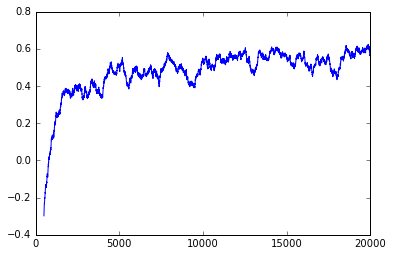

In [12]:
plt.plot(pd.rolling_mean(pd.Series(rList), window=500))

# Reference
1. [Simple Reinforcement Learning with Tensorflow Part 0: Q-Learning with Tables and Neural Networks](https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0)
2. [DEMYSTIFYING DEEP REINFORCEMENT LEARNING](http://neuro.cs.ut.ee/demystifying-deep-reinforcement-learning)